In [1]:
from scipy.io import arff
from collections import defaultdict
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import precision_score, recall_score
import matplotlib.pyplot as plt 

random_state= 42

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
data = arff.loadarff('covtype-normalized.arff')
df = pd.DataFrame(data[0])
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,class
0,0.368684,0.141667,0.045455,0.184681,0.223514,0.071659,0.870079,0.913386,0.582677,0.875366,b'1',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'1',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'5'
1,0.365683,0.155556,0.030303,0.151754,0.215762,0.054798,0.866142,0.925197,0.594488,0.867838,b'1',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'1',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'5'
2,0.472736,0.386111,0.136364,0.191840,0.307494,0.446817,0.921260,0.937008,0.531496,0.853339,b'1',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'1',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'2'
3,0.463232,0.430556,0.272727,0.173228,0.375969,0.434172,0.937008,0.937008,0.480315,0.865886,b'1',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'1',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'2'
4,0.368184,0.125000,0.030303,0.109520,0.222222,0.054939,0.866142,0.921260,0.590551,0.860449,b'1',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'1',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'5'


In [4]:
df_work = df.copy().head(100000)

In [5]:
for col, dtype in df_work.dtypes.items():
    if dtype == object:
        df_work[col] = df_work[col].apply(lambda x: x.decode("utf-8")).astype("int")
df_work.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,class
0,0.368684,0.141667,0.045455,0.184681,0.223514,0.071659,0.870079,0.913386,0.582677,0.875366,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,0.365683,0.155556,0.030303,0.151754,0.215762,0.054798,0.866142,0.925197,0.594488,0.867838,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,0.472736,0.386111,0.136364,0.191840,0.307494,0.446817,0.921260,0.937008,0.531496,0.853339,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,0.463232,0.430556,0.272727,0.173228,0.375969,0.434172,0.937008,0.937008,0.480315,0.865886,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,0.368184,0.125000,0.030303,0.109520,0.222222,0.054939,0.866142,0.921260,0.590551,0.860449,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [24]:
df_work.head().to_csv("cover_dataset_head.csv", index=False)

In [6]:
# FOREST

# All features will be stored in a list
all_method_feats = []
all_scores = []

# Decode the target from binary to utf-8
y = df_work["class"]
X = df_work.drop(["class"],  axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=df_work["class"], random_state=random_state)

In [7]:
def get_most_pop(n_feats, list_of_lists):

    # count the features and select the most common ones
    feat_count = defaultdict(lambda: 0)
    for item in list_of_lists: 
        feat_count[item] += 1
    sorted_feat_count = sorted(feat_count.items())
    sorted_correlations = sorted(sorted_feat_count, key=lambda x: x[1])
    feats = sorted_correlations[::-1][:n_feats]
    
    final_feats = [x[0] for x in feats]

    return final_feats
    

# Feature selection

In [8]:
# Prepare the scaler
scaler = StandardScaler().fit(X_train)

# Scale features
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Number of top features to select
n_feats = 4

In [9]:
# feature selection with logistic regression L1 regularization

lr1 = LogisticRegression(max_iter=10000, random_state=random_state,solver="liblinear", penalty="l1").fit(X_train_scaled, y_train)


df_lr1_dict = {}
for coefs_tup in list(zip(lr1.classes_, lr1.coef_)):
    df_lr1_dict[coefs_tup[0]] = coefs_tup[1]
lr1_df = pd.DataFrame(df_lr1_dict, index=X_train.columns)


feats_lr1 = []
for i in lr1_df.columns:
    temp = lr1_df.sort_values(i, ascending=False)
    feats_lr1.append(list(temp.index[:n_feats]))

# Make a list with all the selected features
all_feats_lr1 = [x for xs in feats_lr1 for x in xs]

# Get the most popular feats from logistic regression
final_feats_lr1 = get_most_pop(n_feats, all_feats_lr1)
all_method_feats.append(final_feats_lr1)

model_lr1 = GradientBoostingClassifier(random_state=random_state).fit(X_train[final_feats_lr1], y_train)

# Score
score_1 = model_lr1.score(X_test[final_feats_lr1], y_test)
all_scores.append(score_1)
print(score_1)



0.79076


In [10]:
# feature selection with logistic regression L2 regularization

lr2 = LogisticRegression(max_iter=10000, random_state=random_state,solver="liblinear", penalty="l2").fit(X_train_scaled, y_train)


df_lr2_dict = {}
for coefs_tup in list(zip(lr2.classes_, lr2.coef_)):
    df_lr2_dict[coefs_tup[0]] = coefs_tup[1]
lr2_df = pd.DataFrame(df_lr2_dict, index=X_train.columns)


feats_lr2 = []
for i in lr2_df.columns:
    temp = lr2_df.sort_values(i, ascending=False)
    feats_lr2.append(list(temp.index[:n_feats]))


# Make a list with all the selected features
all_feats_lr2 = [x for xs in feats_lr2 for x in xs]


# Get the most popular feats from logistic regression
final_feats_lr2 = get_most_pop(n_feats, all_feats_lr2)
all_method_feats.append(final_feats_lr2)


model_lr2 = GradientBoostingClassifier(random_state=random_state).fit(X_train[final_feats_lr2], y_train)

# Score
score_2 = model_lr2.score(X_test[final_feats_lr2], y_test)
all_scores.append(score_2)
print(score_2)

0.70916


In [11]:
# Feature selection with decision tree

# Model to get the most significant features
clf =  DecisionTreeClassifier(random_state=random_state).fit(X_train, y_train)

# selecting the best 10 features out of the most important ones
feature_importance = {"names": clf.feature_names_in_, "importance": clf.feature_importances_}
feature_importance_df = pd.DataFrame(feature_importance)
feature_importance_df.sort_values("importance",ascending=False, inplace=True)

top_x_features = feature_importance_df[:n_feats]

# Best 10 features are in feat_tree
feat_tree = list(top_x_features["names"])
all_method_feats.append(feat_tree)

# Take only the most important features to tune the model
X_train1 = X_train[feat_tree]
X_test1 = X_test[feat_tree]

# Building the model
model = GradientBoostingClassifier(random_state=random_state).fit(X_train1, y_train)

# Score
score_3 = model.score(X_test1, y_test)
all_scores.append(score_3)
print(score_3)


0.8348


In [12]:
# Feature selection with random forest

# Model to get the most significant features
clf_forest =  RandomForestClassifier(random_state=random_state, n_jobs=-1).fit(X_train, y_train)

# selecting the best 10 features out of the most important ones
feature_importance_forest = {"names": clf_forest.feature_names_in_, "importance": clf_forest.feature_importances_}
feature_importance_forest_df = pd.DataFrame(feature_importance_forest)
feature_importance_forest_df.sort_values("importance",ascending=False, inplace=True)

top_x_features = feature_importance_forest_df[:n_feats]

# Best 10 features are in feat_tree
feat_tree_forest = list(top_x_features["names"])
all_method_feats.append(feat_tree_forest)


# Take only the most important features to tune the model
X_train1 = X_train[feat_tree_forest]
X_test1 = X_test[feat_tree_forest]

# Building the model
model_forest_feats = GradientBoostingClassifier(random_state=random_state).fit(X_train1, y_train)

# Score
score_4 = model_forest_feats.score(X_test1, y_test)
all_scores.append(score_4)
print(score_4)

0.84456


In [13]:
# Feature selection with gradient booster

# Model to get the most significant features
clf_booster =  GradientBoostingClassifier(random_state=random_state).fit(X_train, y_train)

# selecting the best 10 features out of the most important ones
feature_importance_booster = {"names": clf_booster.feature_names_in_, "importance": clf_booster.feature_importances_}
feature_importance_booster_df = pd.DataFrame(feature_importance_booster)
feature_importance_booster_df.sort_values("importance",ascending=False, inplace=True)

top_x_features = feature_importance_booster_df[:n_feats]

# Best 10 features are in feat_tree
feat_booster = list(top_x_features["names"])
all_method_feats.append(feat_booster)


# Take only the most important features to tune the model
X_train1 = X_train[feat_booster]
X_test1 = X_test[feat_booster]

# Building the model
model_booster = GradientBoostingClassifier(random_state=random_state).fit(X_train1, y_train)

# Score
score_5 = model_booster.score(X_test1, y_test)
all_scores.append(score_5)
print(score_5)

0.8348


In [14]:
# Less correlated

train_corr_arr = np.abs(X_train.corr().values)
corr_sum = train_corr_arr.sum(axis=0)
corr_sum_list = list(zip(corr_sum, X_train.columns))

sorted_correlations = sorted(corr_sum_list, key=lambda x: x[0])

less_corr_feats = [feat[1] for feat in sorted_correlations[:n_feats]]
all_method_feats.append(less_corr_feats)

# Take only the most important features to tune the model
X_train1 = X_train[less_corr_feats]
X_test1 = X_test[less_corr_feats]

# Building the model
model_corr = GradientBoostingClassifier(random_state=random_state).fit(X_train1, y_train)

# Score
score_6 = model_corr.score(X_test1, y_test)
all_scores.append(score_6)
print(score_6)

0.8072


In [15]:
# Mutual information classification

mutual_info_importances = mutual_info_classif(X_train_scaled, y_train, random_state=random_state)
mutual_info_df = pd.DataFrame(mutual_info_importances, index=X.columns)

# Getting a list of the most significant features
mutual_feats = list(mutual_info_df.sort_values(0, ascending=False).index[:n_feats])
all_method_feats.append(mutual_feats)


# Take only the most important features to tune the model
X_train1 = X_train[mutual_feats]
X_test1 = X_test[mutual_feats]

# Building the model
model_mutual_importance = GradientBoostingClassifier(random_state=random_state).fit(X_train1, y_train)

# Score
score_7 = model_mutual_importance.score(X_test1, y_test)
all_scores.append(score_7)
print(score_7)


0.8154


In [16]:
top_selected_feats = get_most_pop(n_feats, [x for xs in all_method_feats for x in xs])
all_method_feats.append(top_selected_feats)

# Take only the most important features to tune the model
X_train1 = X_train[top_selected_feats]
X_test1 = X_test[top_selected_feats]

# Building the model
model_mutual_importance = GradientBoostingClassifier(random_state=random_state).fit(X_train1, y_train)

# Score
score_8 = model_mutual_importance.score(X_test1, y_test)
all_scores.append(score_8)
print(score_8)

0.8348


# Save results

In [17]:
results_df = pd.DataFrame(all_method_feats + [all_scores]).astype("str")
results_df.to_csv("results.csv", index=False)

# Open Results

In [18]:
results_df = pd.read_csv("results.csv")
all_feats_df = results_df.iloc[:-1].dropna(axis=1)
all_scores_df = results_df.iloc[-1][:all_feats_df.shape[0]].astype("float")

In [19]:
most_pop_feats = all_feats_df.melt().groupby("value").count()
top_15_feats = most_pop_feats.sort_values("variable", ascending=False)[:15]

In [20]:
feat_methods = ["L1 regularization", "L2 regularization", "Decision Tree", "Random Forest", "Gradient Boosting Classifier", "Least correlated features", "sklearn Mutual Information", "Most Popular Features"]

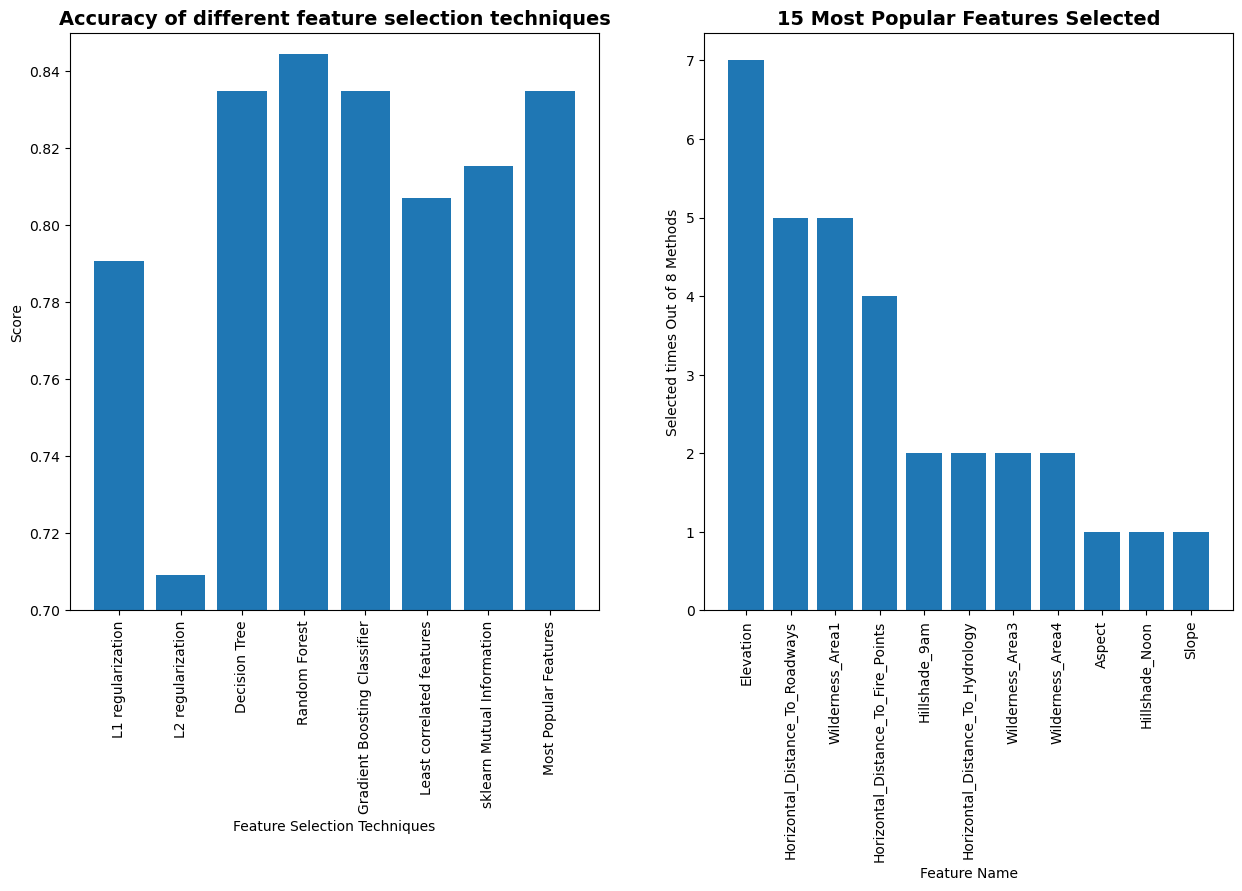

In [22]:
figure, axis = plt.subplots(1,2, figsize=(15, 7.5))

axis[0].bar(feat_methods, list(all_scores_df)) 
axis[0].set_ylim(0.7, 0.85)
axis[0].tick_params(axis='x',labelrotation=90)
axis[0].set(xlabel='Feature Selection Techniques', ylabel='Score')
axis[0].set_title('Accuracy of different feature selection techniques',fontweight="bold", size=14)

axis[1].bar(top_15_feats.index, top_15_feats.variable) 
#axis[1].set_ylim(0.495, 0.71)
axis[1].tick_params(axis='x', labelrotation=90)
axis[1].set(xlabel='Feature Name', ylabel='Selected times Out of 8 Methods')
axis[1].set_title('15 Most Popular Features Selected',fontweight="bold", size=14)

plt.show()

In [5]:
!pip list --format=freeze > requirements.txt